In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
import os

sys.path.append((os.path.dirname(os.path.realpath('../lhs'))))
sys.path.append((os.path.dirname(os.path.realpath('../spatial_plot'))))

import lhs
import spatial_plot
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('../emit_data')
print(df.shape)
df.head()

(22886, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
0,3.22,36.97,7.65,4.78,1.52,0.10,90.483704,37.149964,emit20220810t034648_o22203_s001,20220810,034648,22203,001
1,2.23,36.66,3.77,0.66,1.79,0.02,91.182553,37.631332,emit20220810t034700_o22203_s001,20220810,034700,22203,001
2,2.06,36.37,1.51,0.40,1.71,0.03,91.891301,38.106329,emit20220810t034712_o22203_s001,20220810,034712,22203,001
3,2.08,36.08,2.58,1.04,1.64,0.03,92.610548,38.577816,emit20220810t034724_o22203_s001,20220810,034724,22203,001
4,2.31,35.81,14.88,4.74,1.81,0.00,93.339586,39.044287,emit20220810t034735_o22203_s001,20220810,034735,22203,001


In [4]:
samples = lhs.LatinHypercubeSample_wvr_sza(df, 31, 3)
lhs_samples = df.iloc[samples]
lhs_fids = lhs_samples['fid']
print(lhs_samples.shape)
lhs_samples.head()

(1725, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
17648,0.0,1.99,2.38,0.17,0.63,0.00,3.017590,22.165056,emit20230531t115248_o15108_s000,20230531,115248,15108,000
21446,0.0,1.51,3.16,0.07,1.60,0.03,48.101075,24.881780,emit20230624t084456_o17506_s002,20230624,084456,17506,002
21449,0.0,0.85,4.53,0.05,1.74,0.00,49.657727,23.187604,emit20230624t084531_o17506_s002,20230624,084531,17506,002
21452,0.0,3.12,5.75,0.03,1.80,0.00,51.171624,21.475216,emit20230624t084607_o17506_s002,20230624,084607,17506,002
21474,0.0,2.53,1.73,0.16,1.05,0.00,0.565166,25.262032,emit20230624t115026_o17508_s001,20230624,115026,17508,001


C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


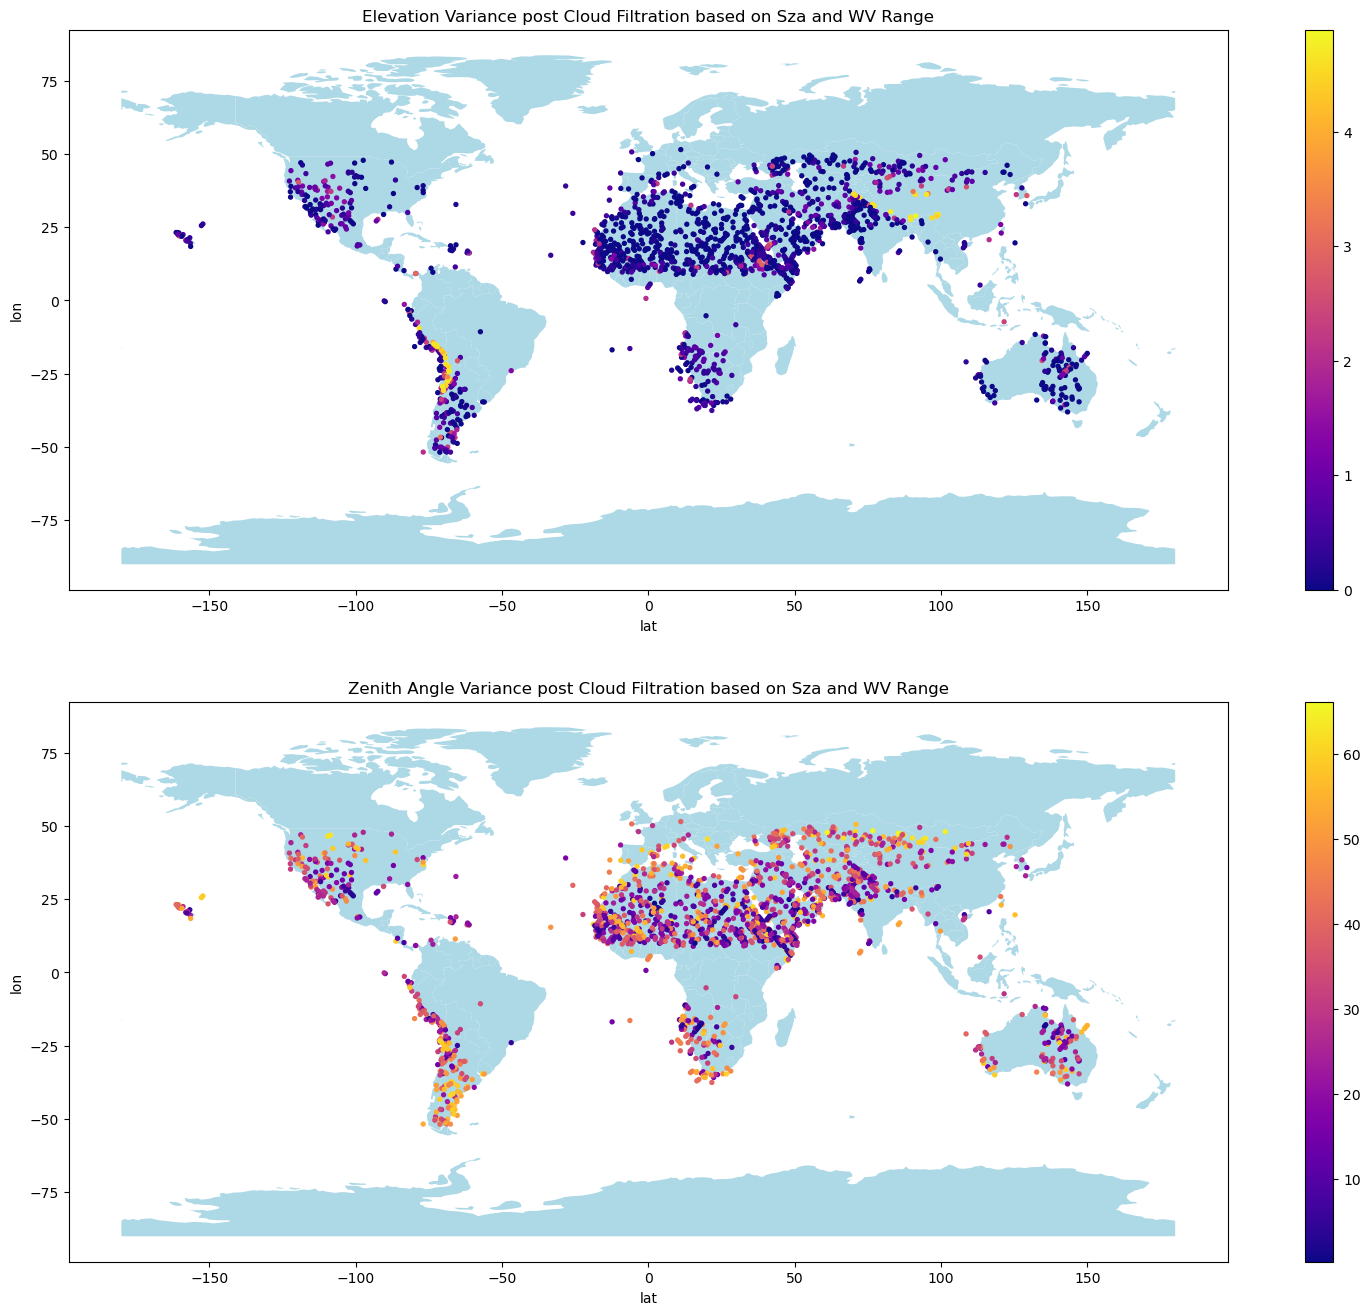

In [5]:
spatial_plot.elev_zen_variance_plt(lhs_samples, ' Sza and WV Range')

C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:55: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


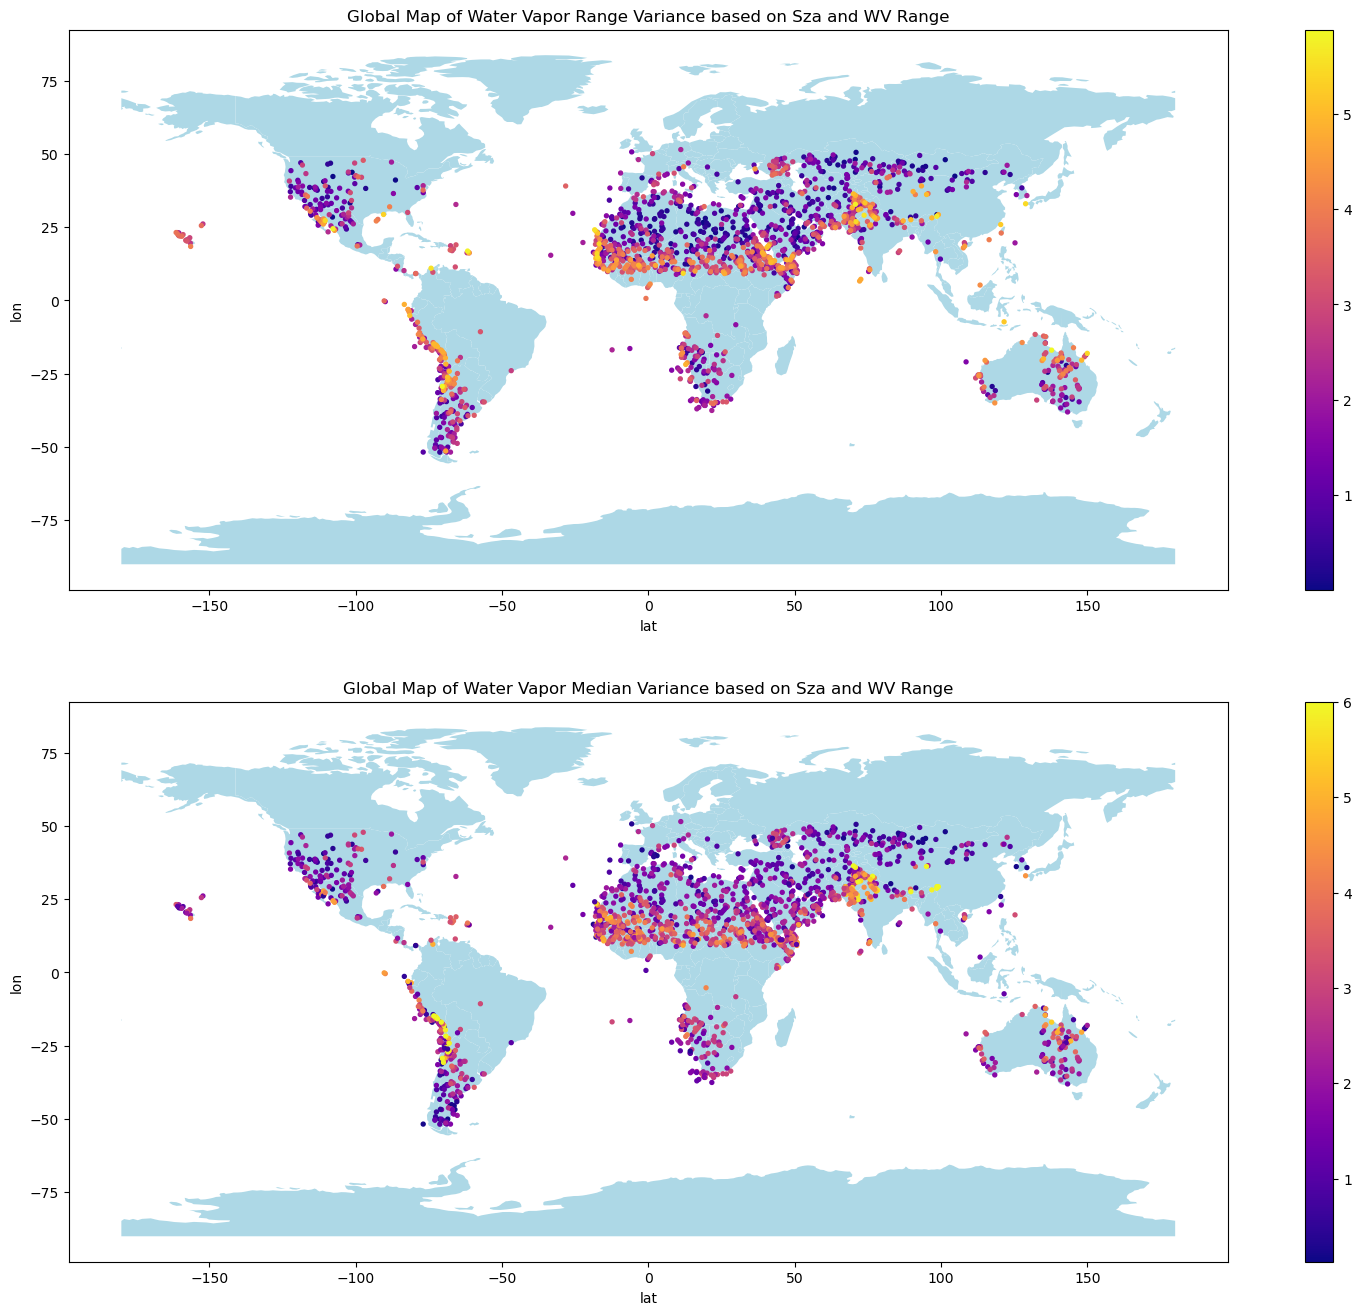

In [6]:
spatial_plot.wv_range_med_variance_plt(lhs_samples, ' Sza and WV Range')

In [8]:
np.savetxt('../train_sets/FIDs_1725.txt', lhs_fids, fmt='%s')